In [1]:
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
import torch_geometric.transforms as T

import torch
import torch.nn as nn
import torch 
from torch_geometric.nn import NNConv
import torch.nn.functional as F

In [3]:
data = QM9(root='./practice_data', transform=None)
dataloader = DataLoader(data, batch_size=1)

In [5]:
dummy = next(iter(dataloader))
print(dummy)

DataBatch(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name=[1], z=[5], batch=[5], ptr=[2])


In [12]:
# visualize classes to check data balance

all_cat = {"0":0, "1":0, "2":0, "3":0, "4":0}

for data in dataloader:
    categories = data.x[:, :5]
    total = torch.sum(categories, dim = 0)
    for idx, count in enumerate(total):
        all_cat[str(idx)] += int(count.item())
    


In [13]:
all_cat

{'0': 1208486, '1': 831925, '2': 132498, '3': 183265, '4': 3036}

<Axes: title={'center': 'classes'}>

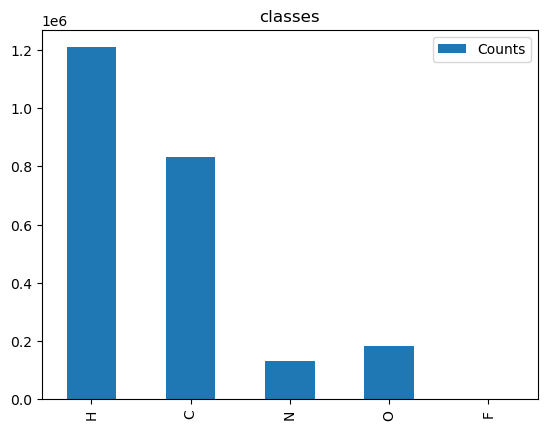

In [16]:
import pandas as pd
cat_df = pd.DataFrame(list(all_cat.values()), index=["H", "C", "N", "O", "F"], columns=["Counts"])
cat_df.plot(kind="bar", title="classes")

<Axes: title={'center': 'classes'}>

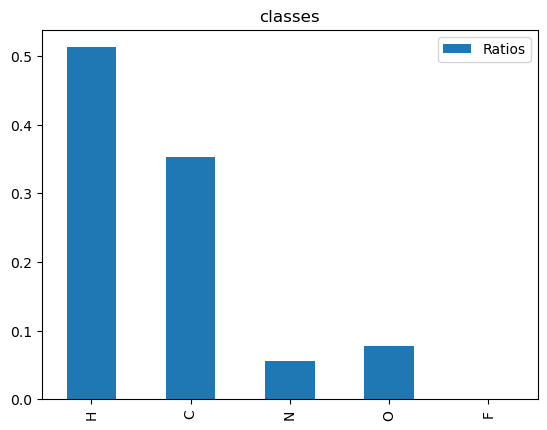

In [23]:
ratios = [val/sum(all_cat.values()) for val in all_cat.values()]
cat_ratio_df = pd.DataFrame(ratios, index=["H", "C", "N", "O", "F"], columns=["Ratios"])
cat_ratio_df.plot(kind="bar", title="classes")

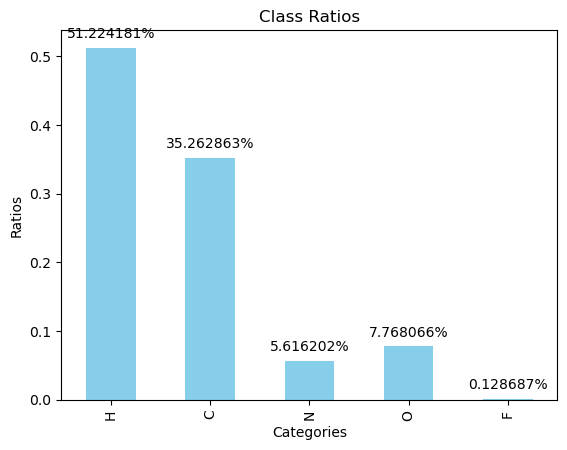

In [27]:
import matplotlib.pyplot as plt
ax = cat_ratio_df.plot(kind="bar", title="Class Ratios", legend=False, color='skyblue')
ax.set_xlabel("Categories")
ax.set_ylabel("Ratios")

# Annotating the bar values
for p in ax.patches:  # loop to access each bar
    ax.annotate(f'{p.get_height()*100:f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [29]:
weights = [sum(all_cat.values()) / (3 * sample) for sample in all_cat.values()]
weights


[0.6507343348068023,
 0.9452815257785657,
 5.935209084917005,
 4.291072126883656,
 259.02613087395696]